# Bloco 4 - Validação Cruzada

## Organizando e Reformulando os Dados

### Ideia

Eu vou dividir o dataframe entre os times. Então, para cada jogo, eu associarei a tendência de gols, escanteios, chutes, escanteios, entre outros, de cada time. Dessa forma, após a adição das tendências, eu terei um dataframe parecido com o inicial, porém, com uma adição de diversas novas features que tornarão o modelo de previsão mais completo.

In [1]:
# importanto algumas bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importanto o dataframe

# Código para ler o arquivo em xls e retorná-lo em dataframe
dfbr = pd.read_excel("dados brasileirao.xlsx")

# Nesta linha, foram tiradas todas as linhas que possuiam dados faltantes, visto que os anos iniciais não tinham todos os dados da tabela preenchidos.
dfbr = dfbr.dropna(axis = 0)

c:\venv\ilumpy\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Execução

In [3]:
# Essa função calcula, a partir de uma lista de valores, qual será a tendência dessa lista para o próximo valor.
def tendencia_de_uma_lista(lista_feature, razao):
    divisor = 1*(1 - razao**4)/(1 - razao) # normalização. Para quatro valores igual a n, a tendencia deverá ser n"
    soma = 0
    for i in range(4):
        termo = lista_feature[-(i+1)]*(razao**(i))
        soma = soma + termo
        
    tendencia = soma/divisor
    
    return round(tendencia, 3)

In [4]:
# função que, a partir de uma feature do mandante, retorna uma feature do visitante
def feature_conjugada(feature):
    if feature == 'gols_man':
        return 'gols_vis', 'time_man'
    
    elif feature == 'gols_vis':
        return 'gols_man', 'time_vis'
    
    elif feature == 'gols_1_tempo_man':
        return 'gols_1_tempo_vis','time_man'
    
    elif feature == 'gols_1_tempo_vis':
        return 'gols_1_tempo_man', 'time_vis'
    
    elif feature == 'escanteios_man':
        return 'escanteios_vis', 'time_man'
    
    elif feature == 'escanteios_vis':
        return 'escanteios_man', 'time_vis'
    
    elif feature == 'faltas_man':
        return 'faltas_vis', 'time_man'
    
    elif feature == 'faltas_vis':
        return 'faltas_man', 'time_vis'
        
    elif feature == 'chutes_bola_parada_man':
        return 'chutes_bola_parada_vis', 'time_man'
        
    elif feature == 'chutes_bola_parada_vis':
        return 'chutes_bola_parada_man', 'time_vis'
    
    elif feature == 'defesas_man':
        return 'defesas_vis', 'time_man'
    
    elif feature == 'defesas_vis':
        return 'defesas_man', 'time_vis'
    
    elif feature == 'impedimentos_man':
        return 'impedimentos_vis', 'time_man'
    
    elif feature == 'impedimentos_vis':
        return 'impedimentos_man', 'time_vis'
    
    elif feature == 'chutes_man':
        return 'chutes_vis', 'time_man'
    
    elif feature == 'chutes_vis':
        return 'chutes_man', 'time_vis'
        
    elif feature == 'chutes_fora_man':
        return 'chutes_fora_vis', 'time_man'
    
    elif feature == 'chutes_fora_vis':
        return 'chutes_fora_man', 'time_vis'
        
    else:
        print("Você tem certeza que essa feature faz parte do dataframe e que possui conjugado?")
        return False, False

In [5]:
# lista contendo as features alteradas
lista_das_features = ['gols_man', 'gols_1_tempo_man', 'escanteios_man', 'faltas_man', 'chutes_bola_parada_man',
                      'defesas_man', 'impedimentos_man', 'chutes_man', 'chutes_fora_man']

In [6]:
# função que cria uma lista das novas colunas de tendência

novas_colunas = []

for feat in lista_das_features:
    feat_conj = feature_conjugada(feat)[0]
    nome_nova_coluna = "tendencia_" + feat
    nome_nova_coluna_conj = "tendencia_" + feat_conj
    novas_colunas.append(nome_nova_coluna)
    novas_colunas.append(nome_nova_coluna_conj)

In [7]:
# função que adiciona as colunas de tendência ao dataframe

for coluna in novas_colunas:
    dfbr[coluna] = pd.NA

In [8]:
# função, em um determinado jogo, calcula as tendências de cada feature relativa ao mandante e ao visitante

def tendencia(index, razao):
    
    # Análise do time mandante
    time_man = dfbr.loc[index]["time_man"] # time mandante
    
    # Cria um dataframe contendo os jogos anteriores do time mandante
    df_anteriores_man = dfbr.loc[((dfbr["time_man"] == time_man) | (dfbr["time_vis"] == time_man)) & (dfbr.index < index)]
    
    # Análise do time visitante
    time_vis = dfbr.loc[index]["time_vis"] # time visitante
    
    # Cria um dataframe contendo os jogos anteriores do time visitante
    df_anteriores_vis = dfbr.loc[((dfbr["time_man"] == time_vis) | (dfbr["time_vis"] == time_vis)) & (dfbr.index < index)]
    
    # laço de repetição que modificará calculará cada tendência e a adicionará a colunas
    for feature in lista_das_features:
        
        # A partir do nome da feature do mandante, é encontrado o nome da feature relativo ao visitante
        feature_conj = feature_conjugada(feature)[0]
        
        # É a lista em que será baseada a tendencia do mandante
        lista_feature_time = []
        
        # Lista que seleciona associa os dados anteriores do time mandante
        for i in df_anteriores_man.index:
    
            if df_anteriores_man["time_man"][i] == time_man:
                lista_feature_time.append(df_anteriores_man[feature][i])
        
            if df_anteriores_man["time_vis"][i] == time_man:
                lista_feature_time.append(df_anteriores_man[feature_conj][i])
        
        # É a lista em que será baseada a tendencia do visitante
        lista_feature_conj_time = []
        
        # Lista que seleciona associa os dados anteriores do time visitante
        for j in df_anteriores_vis.index:

            if df_anteriores_vis["time_man"][j] == time_vis:
                lista_feature_conj_time.append(df_anteriores_vis[feature][j])
        
            if df_anteriores_vis["time_vis"][j] == time_vis:
                lista_feature_conj_time.append(df_anteriores_vis[feature_conj][j])
        
        # A partir da lista obtida, o código só prossegue se essa for maior que 4, o número de jogos analisados na tendência"
        if len(lista_feature_time) >= 4 and len(lista_feature_conj_time) >= 4:
            
            # utiliza a função tendencia_de_uma_lista para calcular a tendencia da feature do mandante
            tendencia_feature = tendencia_de_uma_lista(lista_feature_time, razao)
            
            # utiliza a função tendencia_de_uma_lista para calcular a tendencia da feature do visitante
            tendencia_feature_conj = tendencia_de_uma_lista(lista_feature_conj_time, razao)
            
            nome_coluna = "tendencia_" + feature
            
            nome_coluna_conj = "tendencia_" + feature_conj
            
            # adciona o resultado de tendência do mandante à coluna dessa tendência
            dfbr.at[index, nome_coluna] = tendencia_feature
            
            # adciona o resultado de tendência do mandante à coluna dessa tendência
            dfbr.at[index, nome_coluna_conj] = tendencia_feature_conj
            
    return 

In [9]:
# realiza a função tendencia para todas as linhas
for i in dfbr.index:
    tendencia(i, 0.5)

In [10]:
# Nos jogos em que os times não tinham um retrospecto de, pelo menos, quatro jogos para análise, as colunas de tendencia permaneceram vazias

# Nesta linha, novamente, foram tiradas todas as linhas que possuiam dados faltantes, visto que os anos iniciais não tinham todos os dados da tabela preenchidos.
dfbr = dfbr.dropna(axis = 0)

In [11]:
# Nesta linha, foram retiradas todas as colunas que possuiam dados relativos à estáticas após o começo do jogo. Os Dados após o jogo começar não nos ajudam a prever os nossos resultados, pois são muito específicos de cada jogo. Então vamos analisar o principal: número de gols
dfbr = dfbr.drop(["escanteios_man", "escanteios_vis", "publico_max", "faltas_man", "faltas_vis", "chutes_bola_parada_man",
                  "chutes_bola_parada_vis", "defesas_man", "defesas_vis", "impedimentos_man",
                  "impedimentos_vis", "chutes_man", "chutes_vis", "chutes_fora_man", "chutes_fora_vis",
                  "gols_1_tempo_man", "gols_1_tempo_vis", 'Unnamed: 0', 'ano_campeonato', 'data', 'horario',
                  'estadio', 'arbitro', 'time_man', 'time_vis', 'tecnico_man', 'tecnico_vis', 'rodada', 'publico'], axis=1)

In [12]:
dfbr = dfbr.reset_index(drop = True)
dfbr.head(5)

,colocacao_man,colocacao_vis,valor_equipe_titular_man,valor_equipe_titular_vis,idade_media_titular_man,idade_media_titular_vis,gols_man,gols_vis,tendencia_gols_man,tendencia_gols_vis,...,tendencia_chutes_bola_parada_man,tendencia_chutes_bola_parada_vis,tendencia_defesas_man,tendencia_defesas_vis,tendencia_impedimentos_man,tendencia_impedimentos_vis,tendencia_chutes_man,tendencia_chutes_vis,tendencia_chutes_fora_man,tendencia_chutes_fora_vis
0,17.0,9.0,6200000.0,9050000.0,22.2,31.0,1.0,0.0,0.533,1.6,...,17.333,9.933,4.667,4.067,1.333,0.733,3.267,2.8,4.867,5.6
1,5.0,14.0,47200000.0,10900000.0,30.3,24.5,4.0,0.0,1.2,1.133,...,15.2,13.733,4.4,2.4,1.533,2.533,4.0,6.667,2.133,5.867
2,12.0,11.0,11400000.0,35300000.0,27.8,26.3,0.0,3.0,1.733,2.067,...,20.067,18.067,2.867,2.6,0.067,3.267,5.667,4.067,4.733,3.067
3,8.0,6.0,17700000.0,18950000.0,26.3,29.6,1.0,1.0,0.6,0.6,...,14.267,17.267,5.0,3.667,1.133,2.467,3.067,4.533,2.733,10.467
4,3.0,19.0,41750000.0,6980000.0,28.8,28.9,0.0,1.0,1.4,0.267,...,15.533,14.533,1.733,2.8,0.467,1.6,6.0,2.733,4.933,3.4


## Validação Cruzada

In [15]:
from sklearn.model_selection import cross_val_score

### Regressões

#### Dados para regressões

In [16]:
# Divisão dos dados do dataset em treino e teste

from sklearn.model_selection import train_test_split # Divisão feita usando a função train_test_split

TAMANHO_TESTE = 0.1 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

# Escolha dos índices e seleção feita pela função
indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Atribuição dos índices escolhidos aos dados
dfbr_treino = dfbr.loc[indices_treino].sort_index()
dfbr_teste = dfbr.loc[indices_teste].sort_index()

# Aqui são escolhidos os atributos do dataset e é definido o target 

FEATURES = ['colocacao_man', 'colocacao_vis', 'valor_equipe_titular_man',
       'valor_equipe_titular_vis', 'idade_media_titular_man',
       'idade_media_titular_vis', 'tendencia_gols_man',
       'tendencia_gols_vis', 'tendencia_gols_1_tempo_man',
       'tendencia_gols_1_tempo_vis', 'tendencia_escanteios_man',
       'tendencia_escanteios_vis', 'tendencia_faltas_man',
       'tendencia_faltas_vis', 'tendencia_chutes_bola_parada_man',
       'tendencia_chutes_bola_parada_vis', 'tendencia_defesas_man',
       'tendencia_defesas_vis', 'tendencia_impedimentos_man',
       'tendencia_impedimentos_vis', 'tendencia_chutes_man',
       'tendencia_chutes_vis', 'tendencia_chutes_fora_man',
       'tendencia_chutes_fora_vis']

TARGET = ["gols_man"]

# Divide os dados para se adequarem aos modelos

X_treino = dfbr_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values.ravel()
X_teste = dfbr_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values.ravel()

#### Regressão Linear

In [18]:
"""Testando modelo classificatório de Regressão Linear com Validação Cruzada. 
Sabendo que o score nos dá a incerteza de um gol acontecer, vimos que esse modelo 
apresentou a incerteza de aproximadamente um gol e nos deu um resultado interessante 
comparado ao que fizemos nos blocos passados"""


from sklearn.linear_model import LinearRegression

# Cria um modelo linear
modelo_linear = LinearRegression()

# Treina esse modelo 
modelo_linear.fit(X_treino, y_treino)

NUM_FOLDS = 10
scores = cross_val_score(
    modelo_linear,
    X_treino,
    y_treino,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error" #rmse
)

print("Os scores foram de: ", scores)
print()
print("A média dos scores é de: ", scores.mean())

Os scores foram de:  [-1.11200446 -1.00226446 -1.10951661 -1.08849393 -1.07596098 -1.06805594
 -1.04047525 -1.11232267 -1.19633503 -1.02896422]

A média dos scores é de:  -1.083439354553676


#### Árvore Aleatória 1 (Sem Hiperparâmetros)

In [19]:
"""Usamos a árvore aleatória com validação cruzada e com o novo Dataframe, nessa primeira árvore não foi utilizado
hiperparâmetros"""

# Árvore de Decisão

from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

scores = cross_val_score(
    modelo_dt,
    X_treino,
    y_treino,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error" #rmse
)

print("Os scores foram de: ", scores)
print()
print("A média dos scores é de: ", scores.mean())

Os scores foram de:  [-1.4832397  -1.57585955 -1.61245155 -1.63299316 -1.7368554  -1.6881943
 -1.3662601  -1.6881943  -1.72240142 -1.52382213]

A média dos scores é de:  -1.603027162321629


#### Árvore Aleatória 2 (com Hiperparâmetros)

In [20]:
# Árvore de decisões com hiperparâmetros
"""Nessa árvore utilizamos hiperparâmetros e obtivemos matrizes com os scores"""
from itertools import product

NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 1, 2, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    scores = cross_val_score(
        modelo_dt,
        X_treino,
        y_treino,
        cv=NUM_FOLDS,
        scoring="neg_root_mean_squared_error" #rmse
    )

    print("Os scores foram de: ", scores)
    print()
    print("A média dos scores é de: ", scores.mean())

Os scores foram de:  [-1.4832397  -1.57585955 -1.61245155 -1.63299316 -1.7368554  -1.6881943
 -1.3662601  -1.6881943  -1.72240142 -1.52382213]

A média dos scores é de:  -1.603027162321629
Os scores foram de:  [-1.19291722 -1.02355144 -1.13939    -1.17227819 -1.07065376 -1.00462041
 -1.04016923 -1.08805182 -1.20260746 -0.98632007]

A média dos scores é de:  -1.0920559586888756
Os scores foram de:  [-1.19074136 -1.05840626 -1.17250601 -1.15581688 -1.0472804  -1.0751588
 -1.06771597 -1.08526562 -1.20004924 -1.01765281]

A média dos scores é de:  -1.1070593354485418
Os scores foram de:  [-1.21437728 -1.01811935 -1.19806581 -1.25008946 -1.05923068 -1.07335539
 -1.06590774 -1.03647818 -1.54735103 -0.97892276]

A média dos scores é de:  -1.144189768497489
Os scores foram de:  [-1.44976329 -1.49255581 -1.51644549 -1.58143787 -1.70454507 -1.50332314
 -1.2973028  -1.38123926 -1.68461007 -1.51509442]

A média dos scores é de:  -1.5126317211056715
Os scores foram de:  [-1.18523355 -1.06019275 -1.

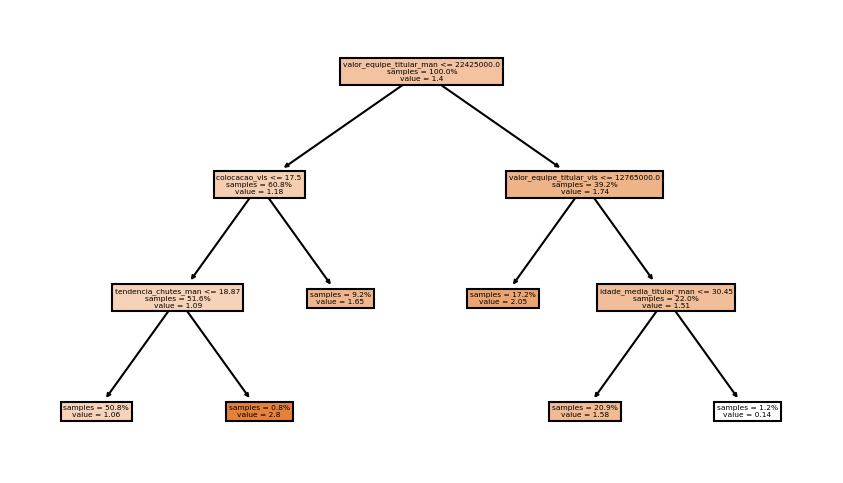

In [21]:
"""Como no Bloco 2 plotamos uma árvore de decisão, decidimos que aqui poderíamos fazer novamente 
com o novo dataframe, para ajudar na visualização e leitura do código"""

# Visualização da Árvore de Decisão

from matplotlib import pyplot as plt
from sklearn import tree

# Cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(X_treino, y_treino)

# Cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# Plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# Salva a imagem
#plt.savefig('ÁrvoreDoFut.png',facecolor='white')

# Mostra o plot para o usuário
plt.show()

**Importância das Features** _(Assim como fizemos com o primeiro Dataframe para analisar a importância das features nas nossas decisões, vamos fazer com esse novo para comparar e discutir resultados)_

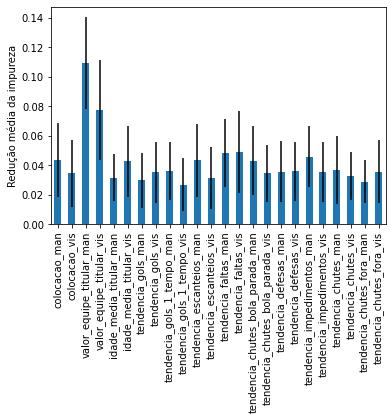

In [23]:
from sklearn.ensemble import RandomForestRegressor

N_ARVORES = 50
N_JOBS = 4

modelo_rf = RandomForestRegressor(
    n_estimators=N_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=N_JOBS,
)

modelo_rf.fit(X_treino, y_treino)

importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

#### Árvore de Aleatória 3 (com Hiperparâmetros)

In [24]:
# Árvore de decisões com outros hiperparâmetros 

from itertools import product

NUM_FOLHAS = [None, 5, 25]
NUM_PROFUNDIDADE = [None, 5, 10, 15, 20]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt1 = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    scores = cross_val_score(
        modelo_dt1,
        X_treino,
        y_treino,
        cv=NUM_FOLDS,
        scoring="neg_root_mean_squared_error" #rmse
    )

print("Os scores foram de: ", scores)
print()
print("A média dos scores é de: ", scores.mean())

Os scores foram de:  [-1.25799291 -1.10162465 -1.30447871 -1.23461458 -1.28541015 -1.35603681
 -1.11646644 -1.08933616 -1.6251681  -1.06041262]

A média dos scores é de:  -1.2431541131156698


#### Floresta Aleatória 1

In [25]:
NUM_ARVORES = 200
NUM_FOLDS = 13
NUM_CPU_CORES = 4

modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=NUM_CPU_CORES,
   # max_leaf_nodes=3, max_depth=3,
)
scores = cross_val_score(
    modelo_rf,
    X_treino,
    y_treino,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error", #RMSE
)

print("Os scores foram de: ", scores)
print()
print("A média dos scores é de: ", scores.mean())


Os scores foram de:  [-0.99565679 -1.2874657  -0.98463246 -1.17817517 -1.16347703 -0.94456454
 -1.00689903 -1.07946444 -1.12295273 -1.09273838 -0.96534771 -1.31763684
 -1.02036066]

A média dos scores é de:  -1.089182422172093


Floresta mudando hiperparametros, com numero de árvores e de jobs

#### Floresta Aleatória 2

In [26]:
NUM_ARVORES = 20
NUM_FOLDS = 13
NUM_CPU_CORES = 4

modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=NUM_CPU_CORES,
    max_leaf_nodes=6, max_depth=6,
)
scores = cross_val_score(
    modelo_rf,
    X_treino,
    y_treino,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error", #RMSE
)

print("Os scores foram de: ", scores)
print()
print("A média dos scores é de: ", scores.mean())

Os scores foram de:  [-0.98829414 -1.31312302 -0.92686961 -1.13723584 -1.16202488 -0.90012383
 -0.98921325 -1.04045034 -1.11250675 -1.1034514  -0.95477657 -1.29464703
 -1.04237682]

A média dos scores é de:  -1.0742379584391053


Árvore com novos hiperparametros apartir do anterior, alterando o numero máximo de folhas e suas profundidades 

### Classificações

#### Dados para classificações

In [27]:
import numpy as np

# Cria uma lista de condições
Condições = [
    (dfbr['gols_man'] > dfbr['gols_vis']),
    (dfbr['gols_man'] == dfbr['gols_vis']),
    (dfbr['gols_man'] < dfbr['gols_vis'])
    ]

# Cria uma lista com os possíveis resultados
Valores = ['Vitória', 'Empate', 'Derrota']

# Cria uma nova coluna com o resultado da partida para o mandante
dfbr['resultado_man'] = np.select(Condições, Valores)

dfbr.head()

,colocacao_man,colocacao_vis,valor_equipe_titular_man,valor_equipe_titular_vis,idade_media_titular_man,idade_media_titular_vis,gols_man,gols_vis,tendencia_gols_man,tendencia_gols_vis,...,tendencia_chutes_bola_parada_vis,tendencia_defesas_man,tendencia_defesas_vis,tendencia_impedimentos_man,tendencia_impedimentos_vis,tendencia_chutes_man,tendencia_chutes_vis,tendencia_chutes_fora_man,tendencia_chutes_fora_vis,resultado_man
0,17.0,9.0,6200000.0,9050000.0,22.2,31.0,1.0,0.0,0.533,1.6,...,9.933,4.667,4.067,1.333,0.733,3.267,2.8,4.867,5.6,Vitória
1,5.0,14.0,47200000.0,10900000.0,30.3,24.5,4.0,0.0,1.2,1.133,...,13.733,4.4,2.4,1.533,2.533,4.0,6.667,2.133,5.867,Vitória
2,12.0,11.0,11400000.0,35300000.0,27.8,26.3,0.0,3.0,1.733,2.067,...,18.067,2.867,2.6,0.067,3.267,5.667,4.067,4.733,3.067,Derrota
3,8.0,6.0,17700000.0,18950000.0,26.3,29.6,1.0,1.0,0.6,0.6,...,17.267,5.0,3.667,1.133,2.467,3.067,4.533,2.733,10.467,Empate
4,3.0,19.0,41750000.0,6980000.0,28.8,28.9,0.0,1.0,1.4,0.267,...,14.533,1.733,2.8,0.467,1.6,6.0,2.733,4.933,3.4,Derrota


In [28]:
# Divisão dos dados do dataset em treino e teste

from sklearn.model_selection import train_test_split # Divisão feita usando a função train_test_split

TAMANHO_TESTE = 0.1 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

# Escolha dos índices e seleção feita pela função
indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Atribuição dos índices escolhidos aos dados
dfbr_treino = dfbr.loc[indices_treino].sort_index()
dfbr_teste = dfbr.loc[indices_teste].sort_index()

# Aqui são escolhidos os atributos do dataset e é definido o target 

FEATURES = ['colocacao_man', 'colocacao_vis', 'valor_equipe_titular_man',
       'valor_equipe_titular_vis', 'idade_media_titular_man',
       'idade_media_titular_vis', 'tendencia_gols_man',
       'tendencia_gols_vis', 'tendencia_gols_1_tempo_man',
       'tendencia_gols_1_tempo_vis', 'tendencia_escanteios_man',
       'tendencia_escanteios_vis', 'tendencia_faltas_man',
       'tendencia_faltas_vis', 'tendencia_chutes_bola_parada_man',
       'tendencia_chutes_bola_parada_vis', 'tendencia_defesas_man',
       'tendencia_defesas_vis', 'tendencia_impedimentos_man',
       'tendencia_impedimentos_vis', 'tendencia_chutes_man',
       'tendencia_chutes_vis', 'tendencia_chutes_fora_man',
       'tendencia_chutes_fora_vis']
TARGET = ["resultado_man"]

# Divide os dados para se adequarem aos modelos

X_treino = dfbr_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values.ravel()
X_teste = dfbr_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values.ravel()

#### K-nn / K-vizinhos

In [29]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()

scores = cross_val_score(
    modelo_knn,
    X_treino,
    y_treino,
    cv=10,
)


print("Os scores foram de: ", scores)
print()
print("A média dos scores é de: ", scores.mean())

Os scores foram de:  [0.38333333 0.41666667 0.36666667 0.48333333 0.46666667 0.41666667
 0.46666667 0.46666667 0.55       0.40677966]

A média dos scores é de:  0.44234463276836156


Deu certo o modelo_knn

#### Árvore Classificatória 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

NUM_FOLHAS = [2, 2, 2]
NUM_PROFUNDIDADE = [None, 2, 4, 8, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeClassifier(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

#A acurácia  determina o grau de exatidão. Em outras palavras, é uma medida para
#quantificar o nível de erro entre um valor desejado, ideal, e um valor real ou medido.

    acuracia= cross_val_score(
        modelo_dt,
        X_treino,
        y_treino,
        cv=NUM_FOLDS,
    )

    print("As acurácias foram de: ", acuracia)
    print()
    print("A média dos acurácias é de: ", acuracia.mean())

#### Árvore Classificatória 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier

NUM_FOLHAS = [None, 2, 3, 6]
NUM_PROFUNDIDADE = [None, 2, 4, 8, 12]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeClassifier(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    acuracia= cross_val_score(
        modelo_dt,
        X_treino,
        y_treino,
        cv=NUM_FOLDS,
    )

    print("As acurácias foram de: ", acuracia)
    print()
    print("A média dos acurácias é de: ", acuracia.mean())

### Árvore Classificatória 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

NUM_FOLHAS = [3, 6, 9]
NUM_PROFUNDIDADE = [None, 2, 4, 8, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeClassifier(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    acuracia= cross_val_score(
        modelo_dt,
        X_treino,
        y_treino,
        cv=NUM_FOLDS,
    )

    print("As acurácias foram de: ", acuracia)
    print()
    print("A média dos acurácias é de: ", acuracia.mean())

### Árvore Classificatória 4

from sklearn.tree import DecisionTreeClassifier

NUM_FOLHAS = [5, 10, 15]
NUM_PROFUNDIDADE = [2, 4, 8, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeClassifier(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )


    acuracia= cross_val_score(
        modelo_dt,
        X_treino,
        y_treino,
        cv=NUM_FOLDS,
    )

    print("As acurácias foram de: ", acuracia)
    print()
    print("A média dos acurácias é de: ", acuracia.mean())

Com a alteração do número de folhas, a acurácia sofria mudanças. Por exemplo, sempre que aumentamos o número de folhas e colocamos valores longes do número 2, a acurácia vai diminuindo. Aqui no código, foi possível analisar essa alteração nas árvores classificatórias. Decidi colocar em ordem decrescente de acurácia para obter uma melhor visualização dessa variação.

Dado que os nossas possibilidades de resultados são apenas 3, "Vitória", "Empate" e "Derrota", supomos que essa leitura da árvore de decisão condiz com o esperado, visto que, não faz sentindo aumentar tanto o número de folhas se temos somente 3 resultados possíveis. O nosso código fitaria demais e daria vitória muito facilmente para o primeiro time.

#### Floresta Classificatória 1

In [31]:
from sklearn.ensemble import RandomForestClassifier

modelo_crf = RandomForestClassifier( )
scores = cross_val_score(
    modelo_crf,
    X_treino,
    y_treino,
    cv=10,
)

print("Os scores foram de: ", scores)
print()
print("A média dos scores é de: ", scores.mean())

Os scores foram de:  [0.53333333 0.5        0.53333333 0.5        0.51666667 0.45
 0.41666667 0.43333333 0.51666667 0.40677966]

A média dos scores é de:  0.48067796610169494


Deu certo o modelo_crf

#### Floresta Classificatória 2

In [32]:
from sklearn.ensemble import RandomForestClassifier

modelo_crf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA,
                        n_estimators=100,  max_leaf_nodes=7, max_depth=7,          )
scores = cross_val_score(
    modelo_crf,
    X_treino,
    y_treino,
    cv=10,
)

print("Os scores foram de: ", scores)
print()
print("A média dos scores é de: ", scores.mean())

Os scores foram de:  [0.51666667 0.51666667 0.5        0.5        0.46666667 0.48333333
 0.45       0.51666667 0.53333333 0.44067797]

A média dos scores é de:  0.4924011299435028


Árvore com novos hiperparametros, classificação, alterando o numero máximo de folhas e suas profundidades.